# Collisions During COVID 
–period defined as March 19 to the end of November–


In [1]:
##import 
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import contextily as ctx
from sodapy import Socrata
import seaborn as sns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

##read selected file; cleaned in previous assignment

df = pd.read_csv('covid_collision_trimmed_16.csv')

In [2]:
df.head()

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID    Area_Name  \
0           0    2020-03-19           2250        2      Rampart   
1           1    2020-03-19           1405       21      Topanga   
2           2    2020-03-19           1450        1      Central   
3           3    2020-03-19           1820       15  N Hollywood   
4           4    2020-03-19           1845       13       Newton   

                                  MO_Codes  Victim_Age Victim_Sex  \
0  3101 3401 3701 0605 3029 3036 3004 3026        26.0       Male   
1       3003 3037 3029 3034 3026 3101 4026        25.0     Female   
2                 3101 3401 3701 0605 3004        89.0       Male   
3                 3004 3026 3101 4026 3037        51.0       Male   
4  3101 3401 3701 3004 3029 3026 3104 0605        33.0     Female   

             Victim_Descent                                  Address  \
0  Hispanic, Latin, Mexican          WILLOW BROOK                 AV   
1                     Black                                  VENTURA   
2                     Other                                  OLYMPIC   
3                     White          MAGNOLIA                     BL   
4  Hispanic, Latin, Mexican  5600 S  CENTRAL                      AV   

                      Cross_Street              Location  Latitude  Longitude  \
0  VERMONT                      AV  (34.0895, -118.2917)   34.0895  -118.2917   
1                       QUAKERTOWN  (34.1714, -118.5698)   34.1714  -118.5698   
2                      S  BROADWAY  (34.0409, -118.2574)   34.0409  -118.2574   
3  COLFAX                       AV  (34.1649, -118.3877)   34.1649  -118.3877   
4                              NaN  (33.9917, -118.2564)   33.9917  -118.2564   

                    geometry  
0  POINT (-118.2917 34.0895)  
1  POINT (-118.5698 34.1714)  
2  POINT (-118.2574 34.0409)  
3  POINT (-118.3877 34.1649)  
4  POINT (-118.2564 33.9917)

In [3]:
##verify if there are any empty columns
df.columns[df.isna().all()].tolist()

[]

### Create counts for the number of accidents per month 

In [9]:
df['Month'] = pd.DatetimeIndex(df['Date_Occurred']).month
df1_grouped = (df.groupby(['Month'])
                .size()
                .reset_index(name="n_traffic_accidents"))
df1_grouped

Month  n_traffic_accidents
0      3                  551
1      4                 1263
2      5                 1648
3      6                 1749
4      7                 2057
5      8                 2034
6      9                 2143
7     10                 1928
8     11                 1502

In [10]:
# put names of the months instead of numbers 

df1_grouped['Month2'] = 'March','April','May','June','July','August','September','October','November'
df1_grouped

Month  n_traffic_accidents     Month2
0      3                  551      March
1      4                 1263      April
2      5                 1648        May
3      6                 1749       June
4      7                 2057       July
5      8                 2034     August
6      9                 2143  September
7     10                 1928    October
8     11                 1502   November

In [11]:
#Graph!

px.line(df1_grouped, x='Month2',
        y='n_traffic_accidents', 
        title='Traffic Collisions during COVID-19',
        labels={'Month2':'Month of Collision','n_traffic_accidents':'Number of Collisions'},
      )

In [7]:
#change crs 

df = gpd.GeoDataFrame(df,
                      crs="EPSG:4326",
                      geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
df = df.to_crs(epsg=3857)

## Bring in neighborhood dataset 
neighborhood data set from the LA Times Data Portal

In [24]:
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

In [25]:
neighborhoods.set_crs(epsg=4326, inplace=True)

kind      external_id             name  \
0    L.A. County Neighborhood (V5)            acton            Acton   
1    L.A. County Neighborhood (V5)  adams-normandie  Adams-Normandie   
2    L.A. County Neighborhood (V5)     agoura-hills     Agoura Hills   
3    L.A. County Neighborhood (V5)       agua-dulce       Agua Dulce   
4    L.A. County Neighborhood (V5)         alhambra         Alhambra   
..                             ...              ...              ...   
267  L.A. County Neighborhood (V5)      willowbrook      Willowbrook   
268  L.A. County Neighborhood (V5)       wilmington       Wilmington   
269  L.A. County Neighborhood (V5)   windsor-square   Windsor Square   
270  L.A. County Neighborhood (V5)         winnetka         Winnetka   
271  L.A. County Neighborhood (V5)   woodland-hills   Woodland Hills   

                                          slug  \
0              acton-la-county-neighborhood-v5   
1    adams-normandie-la-county-neighborhood-v5   
2       agoura-hills-la-county-neighborhood-v5   
3         agua-dulce-la-county-neighborhood-v5   
4           alhambra-la-county-neighborhood-v5   
..                                         ...   
267      willowbrook-la-county-neighborhood-v5   
268       wilmington-la-county-neighborhood-v5   
269   windsor-square-la-county-neighborhood-v5   
270         winnetka-la-county-neighborhood-v5   
271   woodland-hills-la-county-neighborhood-v5   

                                               set  \
0    /1.0/boundary-set/la-county-neighborhoods-v5/   
1    /1.0/boundary-set/la-county-neighborhoods-v5/   
2    /1.0/boundary-set/la-county-neighborhoods-v5/   
3    /1.0/boundary-set/la-county-neighborhoods-v5/   
4    /1.0/boundary-set/la-county-neighborhoods-v5/   
..                                             ...   
267  /1.0/boundary-set/la-county-neighborhoods-v5/   
268  /1.0/boundary-set/la-county-neighborhoods-v5/   
269  /1.0/boundary-set/la-county-neighborhoods-v5/   
270  /1.0/boundary-set/la-county-neighborhoods-v5/   
271  /1.0/boundary-set/la-county-neighborhoods-v5/   

                                              metadata  \
0    {'sqmi': 39.3391089485, 'type': 'unincorporate...   
1    {'sqmi': 0.805350187789, 'type': 'segment-of-a...   
2    {'sqmi': 8.14676029818, 'type': 'standalone-ci...   
3    {'sqmi': 31.4626319451, 'type': 'unincorporate...   
4    {'sqmi': 7.62381430605, 'type': 'standalone-ci...   
..                                                 ...   
267  {'sqmi': 3.76636072646, 'type': 'unincorporate...   
268  {'sqmi': 9.1412927044, 'type': 'segment-of-a-c...   
269  {'sqmi': 0.683463802484, 'type': 'segment-of-a...   
270  {'sqmi': 4.77724070209, 'type': 'segment-of-a-...   
271  {'sqmi': 14.768309648, 'type': 'segment-of-a-c...   

                                          resource_uri  \
0       /1.0/boundary/acton-la-county-neighborhood-v5/   
1    /1.0/boundary/adams-normandie-la-county-neighb...   
2    /1.0/boundary/agoura-hills-la-county-neighborh...   
3    /1.0/boundary/agua-dulce-la-county-neighborhoo...   
4    /1.0/boundary/alhambra-la-county-neighborhood-v5/   
..                                                 ...   
267  /1.0/boundary/willowbrook-la-county-neighborho...   
268  /1.0/boundary/wilmington-la-county-neighborhoo...   
269  /1.0/boundary/windsor-square-la-county-neighbo...   
270  /1.0/boundary/winnetka-la-county-neighborhood-v5/   
271  /1.0/boundary/woodland-hills-la-county-neighbo...   

                                              geometry  
0    MULTIPOLYGON (((-118.20262 34.53899, -118.1894...  
1    MULTIPOLYGON (((-118.30901 34.03741, -118.3004...  
2    MULTIPOLYGON (((-118.76193 34.16820, -118.7263...  
3    MULTIPOLYGON (((-118.25468 34.55830, -118.2555...  
4    MULTIPOLYGON (((-118.12175 34.10504, -118.1168...  
..                                                 ...  
267  MULTIPOLYGON (((-118.23005 33.92809, -118.2280...  
268  MULTIPOLYGON (((-118.22476 33.82461, -118.2245...  
269  MUL

In [26]:
 ##remove columns i don't need.
neighborhoods =neighborhoods[['name','geometry']]
neighborhoods.head(1)

name                                           geometry
0  Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...

In [27]:
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

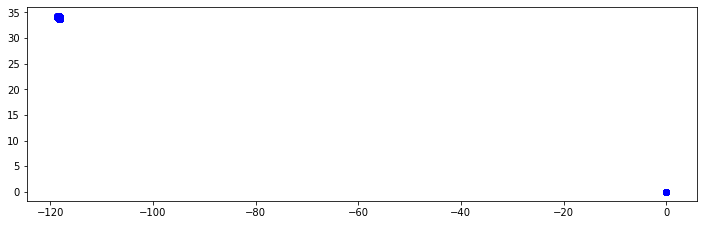

In [28]:
#Plot the points 

df.plot(figsize=(12,12),color='blue')

In [29]:
# and we've got some outliers... sorting to see what the locations are 
df.sort_values('Longitude',ascending=False)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID    Area_Name  \
1580        1580    2020-04-25           1645       19      Mission   
1423        1423    2020-04-22           1720       15  N Hollywood   
2766        2766    2020-05-19           1330       21      Topanga   
1571        1571    2020-04-25           1340       19      Mission   
1557        1557    2020-04-25           1355       10  West Valley   
...          ...           ...            ...      ...          ...   
2715        2715    2020-05-18           1845       21      Topanga   
885          885    2020-04-08           1500       21      Topanga   
6308        6308    2020-07-17           1500       21      Topanga   
8023        8023    2020-08-12           1645       21      Topanga   
5809        5809    2020-07-10           1100       21      Topanga   

                                     MO_Codes  Victim_Age Victim_Sex  \
1580                 3004 3036 3026 3101 4026        55.0       Male   
1423            0605 3004 3037 3025 3101 4015        27.0       Male   
2766                 3004 3026 3037 3101 4026        50.0       Male   
1571                 3008 3036 3026 3101 4026        41.0       Male   
1557                 3004 3036 3026 3101 4026        38.0     Female   
...                                       ...         ...        ...   
2715                 3004 3025 3036 3101 4021        18.0       Male   
885   3004 3037 3602 3034 3029 3025 3101 4026        49.0     Female   
6308            3004 3037 3034 3028 3101 4026        99.0       Male   
8023            3004 3034 3028 3101 4021 3036        26.0       Male   
5809                 3004 3036 3026 3101 4021        25.0       Male   

                Victim_Descent                          Address  \
1580  Hispanic, Latin, Mexican  GLENOAKS                     BL   
1423                     White  CAHUENGA                     BL   
2766                     White  TOPANGA CANYON               BL   
1571  Hispanic, Latin, Mexican  LAUREL CANYON                BL   
1557  Hispanic, Latin, Mexican  RESEDA                       BL   
...                        ...                              ...   
2715                     Other  VANOWEN                      ST   
885                      Black  VALLEY CIR                   BL   
6308                     White  SALAMEA                      AV   
8023                     White  VALLEY CIRCLE                BL   
5809                     White  VALLEY CIRCLE                BL   

                         Cross_Street              Location  Latitude  \
1580  TYLER                        ST            (0.0, 0.0)    0.0000   
1423  MAGNOLIA                     BL            (0.0, 0.0)    0.0000   
2766  VANOWEN                      ST            (0.0, 0.0)    0.0000   
1571  RINCON                       AV            (0.0, 0.0)    0.0000   
1557  HATTERAS                     ST            (0.0, 0.0)    0.0000   
...                               ...                   ...       ...   
2715  SHELTONDALE                  AV  (34.1946, -118.6536)   34.1946   
885   VICTORY                      BL  (34.1883, -118.6536)   34.1883   
6308  OXNARD                       ST  (34.1796, -118.6545)   34.1796   
8023  BELL CANYON                  BL  (34.2025, -118.6559)   34.2025   
5809  CALVERT                      ST  (34.1828, -118.6561)   34.1828   

      Longitude                     geometry  Month  
1580     0.0000      POINT (0.00000 0.00000)      4  
1423     0.0000      POINT (0.00000 0.00000)      4  
2766     0.0000      POINT (0.00000 0.00000)      5  
1571     0.0000      POINT (0.00000 0.00000)      4  
1557     0.0000      POINT (0.00000 0.00000)      4  
...         ...                          ...    ...  
2715  -118.6536  POINT (-118.65360 34.19460)      5  
885   -118.6536  POINT (-118.65360 34.18830)      4  
6308  -118.6545  POINT (-118.65450 34.17960)      7  
8023  -118.6559  POINT (-118.65590 34.20250)      8  
5809  -118.6

In [30]:
df.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14875 entries, 0 to 14874
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      14875 non-null  int64   
 1   Date_Occurred   14875 non-null  object  
 2   Time_Occurred   14875 non-null  int64   
 3   Area_ID         14875 non-null  int64   
 4   Area_Name       14875 non-null  object  
 5   MO_Codes        14875 non-null  object  
 6   Victim_Age      14541 non-null  float64 
 7   Victim_Sex      14846 non-null  object  
 8   Victim_Descent  14841 non-null  object  
 9   Address         14875 non-null  object  
 10  Cross_Street    14379 non-null  object  
 11  Location        14875 non-null  object  
 12  Latitude        14875 non-null  float64 
 13  Longitude       14875 non-null  float64 
 14  geometry        14875 non-null  geometry
 15  Month           14875 non-null  int64   
dtypes: float64(3), geometry(1), int64(4), object(8)
me

In [31]:
#So it looks like the type of Latitude and Longitude are objects and not int64s
df["Latitude"] = df.Latitude.astype(float)
df["Longitude"] = df.Longitude.astype(float)

In [32]:
# check that it worked
df.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14875 entries, 0 to 14874
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      14875 non-null  int64   
 1   Date_Occurred   14875 non-null  object  
 2   Time_Occurred   14875 non-null  int64   
 3   Area_ID         14875 non-null  int64   
 4   Area_Name       14875 non-null  object  
 5   MO_Codes        14875 non-null  object  
 6   Victim_Age      14541 non-null  float64 
 7   Victim_Sex      14846 non-null  object  
 8   Victim_Descent  14841 non-null  object  
 9   Address         14875 non-null  object  
 10  Cross_Street    14379 non-null  object  
 11  Location        14875 non-null  object  
 12  Latitude        14875 non-null  float64 
 13  Longitude       14875 non-null  float64 
 14  geometry        14875 non-null  geometry
 15  Month           14875 non-null  int64   
dtypes: float64(3), geometry(1), int64(4), object(8)
me

In [33]:
#try the code again to sort out the 0,0

df_map= (df[df["Latitude"] >= 33])
df_map.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14755 entries, 0 to 14874
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      14755 non-null  int64   
 1   Date_Occurred   14755 non-null  object  
 2   Time_Occurred   14755 non-null  int64   
 3   Area_ID         14755 non-null  int64   
 4   Area_Name       14755 non-null  object  
 5   MO_Codes        14755 non-null  object  
 6   Victim_Age      14424 non-null  float64 
 7   Victim_Sex      14726 non-null  object  
 8   Victim_Descent  14721 non-null  object  
 9   Address         14755 non-null  object  
 10  Cross_Street    14272 non-null  object  
 11  Location        14755 non-null  object  
 12  Latitude        14755 non-null  float64 
 13  Longitude       14755 non-null  float64 
 14  geometry        14755 non-null  geometry
 15  Month           14755 non-null  int64   
dtypes: float64(3), geometry(1), int64(4), object(8)
me

In [34]:
df_map.sort_values('Longitude',ascending=False)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID   Area_Name  \
9666        9666    2020-09-05           2000        4  Hollenbeck   
825          825    2020-04-07           2020        4  Hollenbeck   
7088        7088    2020-07-29           1735        4  Hollenbeck   
8073        8073    2020-08-13             30        4  Hollenbeck   
875          875    2020-04-08           1350        4  Hollenbeck   
...          ...           ...            ...      ...         ...   
885          885    2020-04-08           1500       21     Topanga   
2715        2715    2020-05-18           1845       21     Topanga   
6308        6308    2020-07-17           1500       21     Topanga   
8023        8023    2020-08-12           1645       21     Topanga   
5809        5809    2020-07-10           1100       21     Topanga   

                                     MO_Codes  Victim_Age Victim_Sex  \
9666       3101 3401 3701 0605 3036 3004 3026        24.0     Female   
825   0605 3101 3401 3701 3003 3025 3029 3036        66.0       Male   
7088       0605 3101 3401 3701 3004 3030 3036        43.0       Male   
8073       0605 3101 3401 3701 3030 3036 3004        20.0       Male   
875        3101 3401 3701 0605 3003 3036 3024        26.0     Female   
...                                       ...         ...        ...   
885   3004 3037 3602 3034 3029 3025 3101 4026        49.0     Female   
2715                 3004 3025 3036 3101 4021        18.0       Male   
6308            3004 3037 3034 3028 3101 4026        99.0       Male   
8023            3004 3034 3028 3101 4021 3036        26.0       Male   
5809                 3004 3036 3026 3101 4021        25.0       Male   

                Victim_Descent                          Address  \
9666  Hispanic, Latin, Mexican  KENDALL                      AV   
825                      Black  HUNTINGTON                   DR   
7088  Hispanic, Latin, Mexican  HUNTINGTON                   DR   
8073                     White  HUNTINGTON                   DR   
875   Hispanic, Latin, Mexican  HUNTINGTON                   DR   
...                        ...                              ...   
885                      Black  VALLEY CIR                   BL   
2715                     Other  VANOWEN                      ST   
6308                     White  SALAMEA                      AV   
8023                     White  VALLEY CIRCLE                BL   
5809                     White  VALLEY CIRCLE                BL   

                         Cross_Street              Location  Latitude  \
9666  HUNTINGTON                   DR  (34.0986, -118.1554)   34.0986   
825   MAIN                         ST  (34.0961, -118.1567)   34.0961   
7088  MAYCREST                     RD  (34.0931, -118.1608)   34.0931   
8073                         MAYCREST   (34.0931, -118.161)   34.0931   
875   LOWELL                       AV   (34.093, -118.1617)   34.0930   
...                               ...                   ...       ...   
885   VICTORY                      BL  (34.1883, -118.6536)   34.1883   
2715  SHELTONDALE                  AV  (34.1946, -118.6536)   34.1946   
6308  OXNARD                       ST  (34.1796, -118.6545)   34.1796   
8023  BELL CANYON                  BL  (34.2025, -118.6559)   34.2025   
5809  CALVERT                      ST  (34.1828, -118.6561)   34.1828   

      Longitude                     geometry  Month  
9666  -118.1554  POINT (-118.15540 34.09860)      9  
825   -118.1567  POINT (-118.15670 34.09610)      4  
7088  -118.1608  POINT (-118.16080 34.09310)      7  
8073  -118.1610  POINT (-118.16100 34.09310)      8  
875   -118.1617  POINT (-118.16170 34.09300)      4  
...         ...                          ...    ...  
885   -118.6536  POINT (-118.65360 34.18830)      4  
2715  -118.6536  POINT (-118.65360 34.19460)      5  
6308  -118.6545  POINT (-118.65450 34.17960)      7  
8023  -118.6559  POINT (-118.65590 34.20250)      8  
5809  -118.6561  POINT (

In [35]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

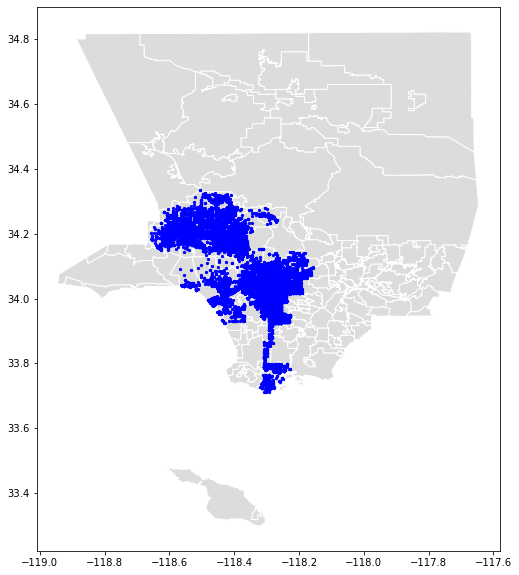

In [36]:
#try mapping again and overlay 

base = neighborhoods.plot(figsize=(30,10),color='gainsboro', edgecolor='white')

# define the layer that will go on top, and add the base layer to the `ax` argument
ax = df_map.plot(ax = base, color='blue', markersize=5)

In [37]:
df_map.set_crs(epsg=4326, inplace=True)


/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID    Area_Name  \
0               0    2020-03-19           2250        2      Rampart   
1               1    2020-03-19           1405       21      Topanga   
2               2    2020-03-19           1450        1      Central   
3               3    2020-03-19           1820       15  N Hollywood   
4               4    2020-03-19           1845       13       Newton   
...           ...           ...            ...      ...          ...   
14870       14870    2020-11-30           2020        2      Rampart   
14871       14871    2020-11-30            620        3    Southwest   
14872       14872    2020-11-30           1925       17   Devonshire   
14873       14873    2020-11-30           1230       13       Newton   
14874       14874    2020-11-30           1600        3    Southwest   

                                      MO_Codes  Victim_Age Victim_Sex  \
0      3101 3401 3701 0605 3029 3036 3004 3026        26.0       Male   
1           3003 3037 3029 3034 3026 3101 4026        25.0     Female   
2                     3101 3401 3701 0605 3004        89.0       Male   
3                     3004 3026 3101 4026 3037        51.0       Male   
4      3101 3401 3701 3004 3029 3026 3104 0605        33.0     Female   
...                                        ...         ...        ...   
14870       0605 3101 3401 3701 3030 3004 3036        45.0       Male   
14871                 4025 3037 3004 3026 3101        44.0     Female   
14872            3004 3028 3030 3037 3101 4026        43.0     Female   
14873            3101 3401 3701 3004 3104 0605        27.0     Female   
14874            4025 3037 3004 3026 3029 3101        30.0     Female   

                 Victim_Descent                                  Address  \
0      Hispanic, Latin, Mexican          WILLOW BROOK                 AV   
1                         Black                                  VENTURA   
2                         Other                                  OLYMPIC   
3                         White          MAGNOLIA                     BL   
4      Hispanic, Latin, Mexican  5600 S  CENTRAL                      AV   
...                         ...                                      ...   
14870  Hispanic, Latin, Mexican                                     12TH   
14871                     Black          FAIRFAX                      AV   
14872  Hispanic, Latin, Mexican                                  DE SOTO   
14873  Hispanic, Latin, Mexican                                 BROADWAY   
14874                     Black          FARMDALE                     AV   

                          Cross_Street              Location  Latitude  \
0      VERMONT                      AV  (34.0895, -118.2917)   34.0895   
1                           QUAKERTOWN  (34.1714, -118.5698)   34.1714   
2                          S  BROADWAY  (34.0409, -118.2574)   34.0409   
3      COLFAX                       AV  (34.1649, -118.3877)   34.1649   
4                                  NaN  (33.9917, -118.2564)   33.9917   
...                                ...                   ...       ...   
14870                         WESTLAKE  (34.0506, -118.2769)   34.0506   
14871  ADAMS                        AV  (34.0324, -118.3706)   34.0324   
14872                       DEVONSHIRE  (34.2573, -118.5886)   34.2573   
14873  47TH                         PL  (34.0001, -118.2783)   34.0001   
14874  EXPOSITION                   BL  (34.0239, -118.3461)   34.0239   

       Longitude                     geometry  Month  
0      -118.2917  POINT (-118.29170 34.08950)      3  
1      -118.5698  POINT (-118.56980 34.17140)      3  
2      -118.2574  POINT (-118.25740 34.04090)      3  
3      -118.3877  POINT (-118.38770 34.16490)      3  
4      -118.2564  POINT (-118.25640 33.99170)      3  
...          ...                          ...    ...  
14870  -118.2769  POINT (-118.27690 34.05060)     11  
14871  -118.3706  POINT

In [38]:
df_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
#will try spatial join for the two datasets

join = gpd.sjoin(neighborhoods,
                 df_map,
                 how='right')

In [40]:
join.head()

index_left             name  Unnamed: 0 Date_Occurred  Time_Occurred  \
4734          1.0  Adams-Normandie        4734    2020-06-23           1510   
9105          1.0  Adams-Normandie        9105    2020-08-28           2130   
13660         1.0  Adams-Normandie       13660    2020-11-05            720   
2632          1.0  Adams-Normandie        2632    2020-05-16           1615   
9422          1.0  Adams-Normandie        9422    2020-09-02           1415   

       Area_ID  Area_Name                       MO_Codes  Victim_Age  \
4734         3  Southwest       3037 3008 3025 3029 3101        66.0   
9105         3  Southwest            3037 3004 3026 3101        42.0   
13660        3  Southwest  4025 3037 3004 3028 3030 3101        21.0   
2632         3  Southwest            3036 3004 3026 3101        26.0   
9422         3  Southwest            3037 3008 3025 3101        19.0   

      Victim_Sex            Victim_Descent                          Address  \
4734        Male  Hispanic, Latin, Mexican  WESTERN                      AV   
9105        Male                     White  HALLDALE                     AV   
13660     Female                     White  NORMANDIE                    AV   
2632        Male  Hispanic, Latin, Mexican  WESTERN                      AV   
9422        Male                   Unknown  WESTERN                      AV   

                             Cross_Street              Location  Latitude  \
4734   S  30TH                         ST  (34.0273, -118.3089)   34.0273   
9105   N  30TH                         ST  (34.0273, -118.3028)   34.0273   
13660     30TH                         ST  (34.0273, -118.3002)   34.0273   
2632      29TH                         ST  (34.0291, -118.3089)   34.0291   
9422   N  29TH                         ST  (34.0291, -118.3089)   34.0291   

       Longitude                     geometry  Month  
4734   -118.3089  POINT (-118.30890 34.02730)      6  
9105   -118.3028  POINT (-118.30280 34.02730)      8  
13660  -118.3002  POINT (-118.30020 34.02730)     11  
2632   -118.3089  POINT (-118.30890 34.02910)      5  
9422   -118.3089  POINT (-118.30890 34.02910)      9

In [41]:
collisions_by_neighborhoods = join.name.value_counts().rename_axis('name').reset_index(name='traffic_collision_count')

In [42]:
collisions_by_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     141 non-null    object
 1   traffic_collision_count  141 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [43]:
#Making an average daily collision count, so will be creating a new column that divides the traffic collion county 
#by the number of days of the pandemic

collisions_by_neighborhoods['avg_collisions_per_day'] = collisions_by_neighborhoods['traffic_collision_count']/257 
collisions_by_neighborhoods.head()

name  traffic_collision_count  avg_collisions_per_day
0                Downtown                      849                3.303502
1                Van Nuys                      527                2.050584
2                Florence                      447                1.739300
3         Vermont-Slauson                      379                1.474708
4  Historic South-Central                      337                1.311284

In [44]:
collisions_by_neighborhoods.tail()

name  traffic_collision_count  avg_collisions_per_day
136      South Gate                        1                0.003891
137  West Hollywood                        1                0.003891
138        Alhambra                        1                0.003891
139  Marina del Rey                        1                0.003891
140          Lomita                        1                0.003891

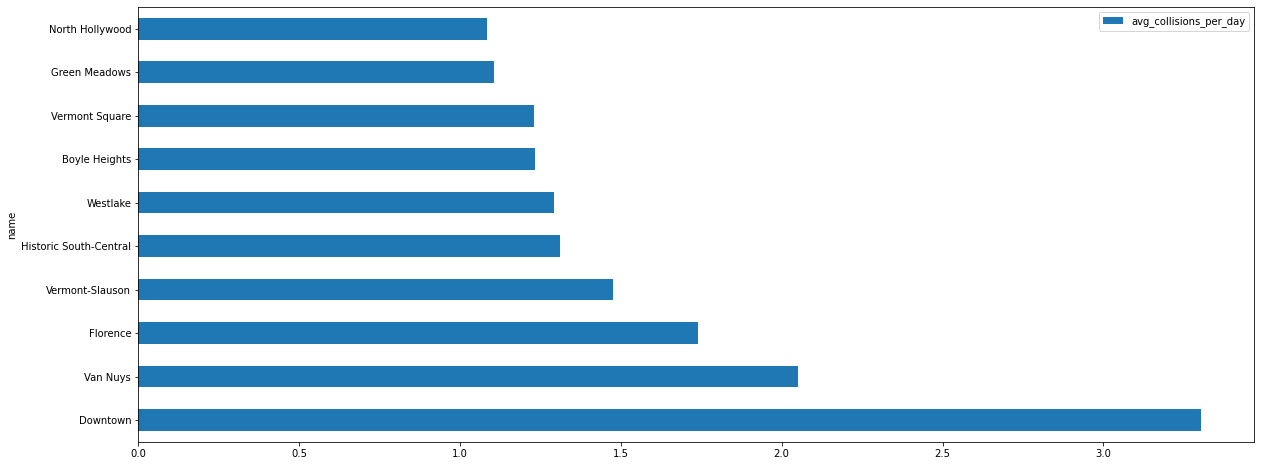

In [45]:
##do a bar chart to see the top 10 neighborhoods with the highest traffic collision rates
collisions_by_neighborhoods[:10].plot.barh(figsize=(20,8),x='name',y='avg_collisions_per_day')

In [46]:
px.bar(collisions_by_neighborhoods,
       x='name',
       y='avg_collisions_per_day',
       title='Average Traffic Collisions per Day during COVID-19',
       labels={'name':'Neighborhood','avg_collisions_per_day':'Average Daily Collisions'}
      )

In [47]:
neighborhoods=neighborhoods.merge(collisions_by_neighborhoods,on='name')

In [48]:
neighborhoods.head(1)

name                                           geometry  \
0  Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...   

   traffic_collision_count  avg_collisions_per_day  
0                       69                0.268482

# Chloropleth Maps

In [49]:
neighborhoods = neighborhoods.to_crs(epsg=3857)

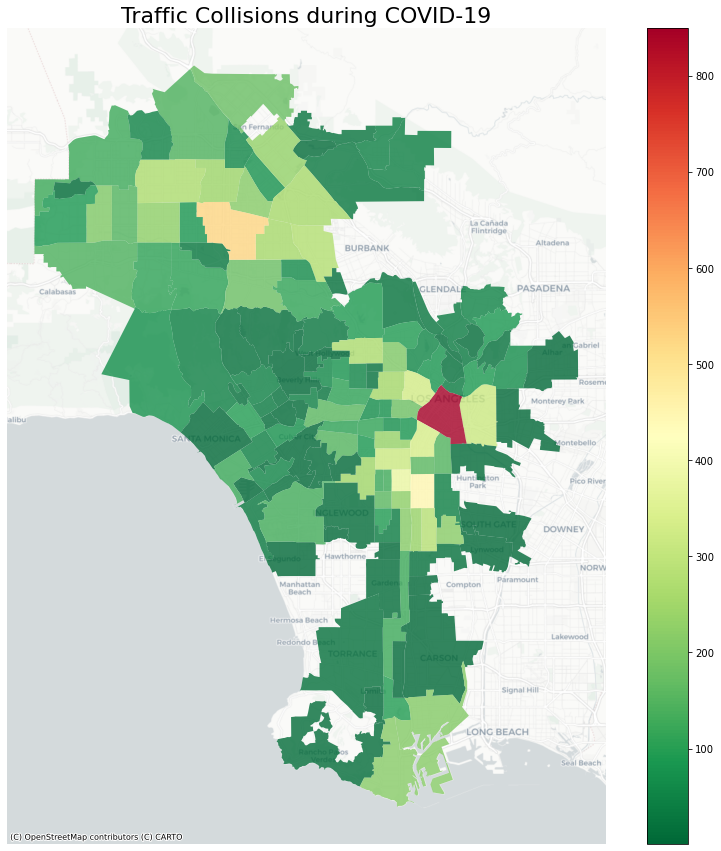

In [50]:
#Mapping traffic collison counts

ax = neighborhoods.plot(figsize=(15,15),
                        column='traffic_collision_count',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Traffic Collisions during COVID-19',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

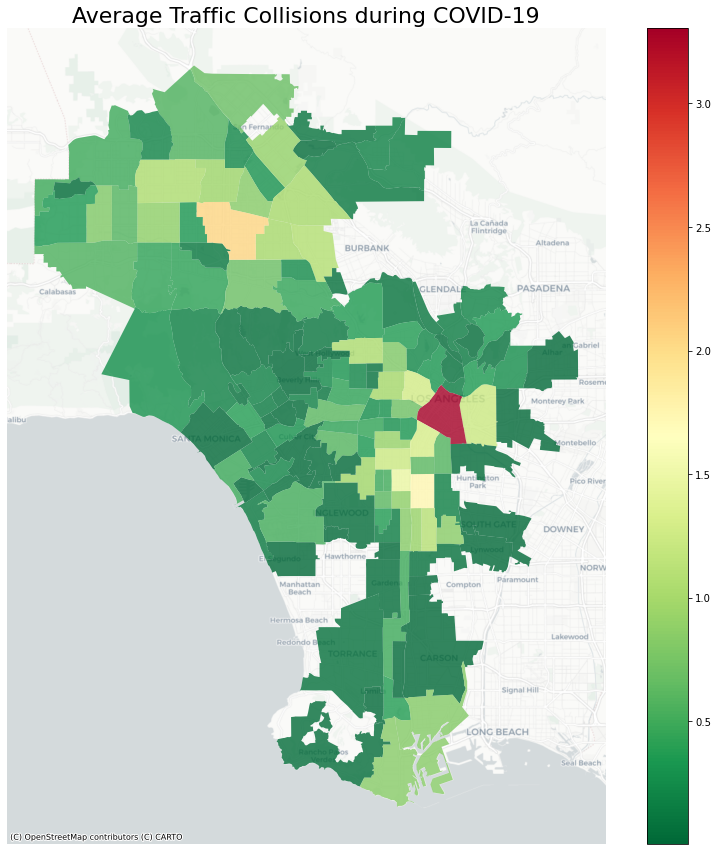

In [51]:
#Mapping traffic collison counts

ax = neighborhoods.plot(figsize=(15,15),
                        column='avg_collisions_per_day',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Average Traffic Collisions during COVID-19',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [52]:
neighborhoods = neighborhoods.to_crs(epsg=4326)

In [53]:
##check the total bounds of the dataset
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

In [54]:
center_lat=(maxy-miny)/2+miny
center_lat

34.020922350091055

In [55]:
center_lon=(maxx-minx)/2+minx
center_lon

-118.38818250000014

In [56]:
#create an interactive map!

map = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='avg_collisions_per_day',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5,
                           range_color=(0, 4),
                          )
map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map.show()

In [41]:
#save as an interactive HTML for the storymap
map.write_html("traffic_rates1_during-COVID2.html")

# Point Pattern Analysis

In [57]:
#Make sure the crs is the same for both df

df_map =df_map.to_crs(epsg=3857)
neighborhoods = neighborhoods.to_crs(epsg=3857)  

In [58]:

neighborhoods.geometry.total_bounds

array([-13210080.92568658,   3989197.3590462 , -13147743.45799573,
         4074184.50420135])

In [59]:
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13210080.925686583
-13147743.457995731
3989197.3590462003
4074184.504201355


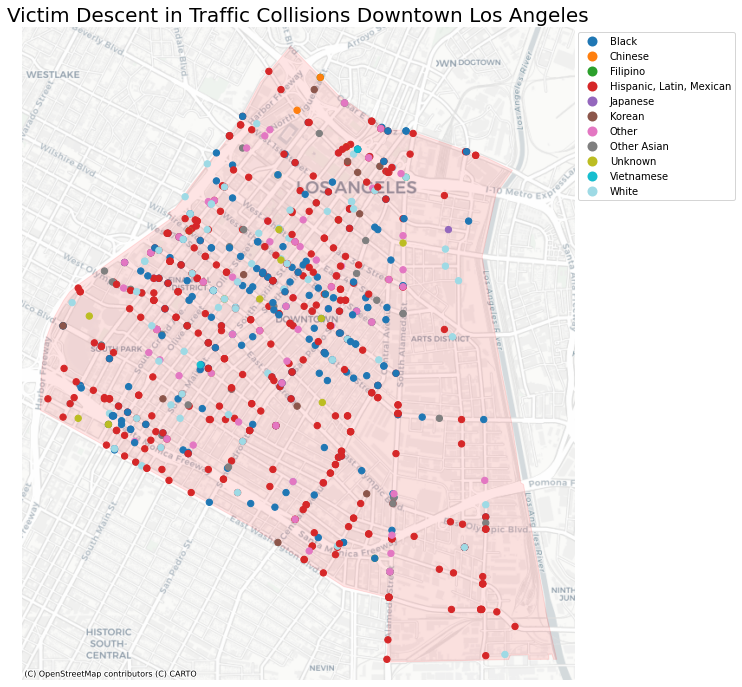

In [60]:
#Time to create the function: 

# subset the neighborhoods geodataframe for a single neighborhood
neighborhood = neighborhoods[neighborhoods.name=='Downtown']

# use bound box coordinates to set the x and y limits
minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

# spatial join to get collision information in neighborhood
collisions_in_neighborhood = gpd.sjoin(df_map,neighborhood,how='inner')

# define the base layer to be the neighborhood polygon
base = neighborhood.plot(figsize=(12,12),
                         color='red', 
                         edgecolor='red',
                         alpha=0.1)

# add the collision data, making sure to add the neighborhood polygon
ax = collisions_in_neighborhood.plot(ax=base, 
                                column='Victim_Descent', 
                                markersize=40, 
                                legend=True,
                                cmap='tab20',
                                legend_kwds={
                                   'loc': 'upper right',
                                   'bbox_to_anchor':(1.3,1)
                                }                  # this puts the legend to the side
                            )

# set the map extent to the extent of the neighborhood bounds
ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 200, maxy + 200)

# turn off the axis
ax.axis('off')

# add a title
ax.set_title('Victim Descent in Traffic Collisions '+neighborhood.name.values[0]+' Los Angeles',fontsize=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax

In [61]:
#Define the function

def map_collisions_by_neighborhood(place='Downtown'):
    
    # subset the neighborhoods geodataframe for a single neighborhood
    neighborhood = neighborhoods[neighborhoods.name==place]
    
    # use bound box coordinates to set the x and y limits
    minx, miny, maxx, maxy = neighborhood.geometry.total_bounds
    
    # spatial join to get collision information in neighborhood
    collisions_in_neighborhood = gpd.sjoin(df_map,neighborhood,how='inner')
    
    # define the base layer to be the neighborhood polygon
    base = neighborhood.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.1)
    # add the collision data, making sure to add the neighborhood polygon
    ax = collisions_in_neighborhood.plot(ax=base, 
                                         column='Victim_Descent', 
                                         markersize=40, 
                                         legend=True,
                                         cmap='tab20',
                                         legend_kwds={
                                             'loc': 'upper right',
                                             'bbox_to_anchor':(1.3,1)
                                         }                  # this puts the legend to the side
                                        )
    
    # set the map extent to the extent of the neighborhood bounds
    ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
    ax.set_ylim(miny - 200, maxy + 200)
    
    # turn off the axis
    ax.axis('off')
    
    # add a title
    ax.set_title('Victim Descent in Traffic Collisions '+neighborhood.name.values[0]+' Los Angeles',fontsize=20)
    
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax

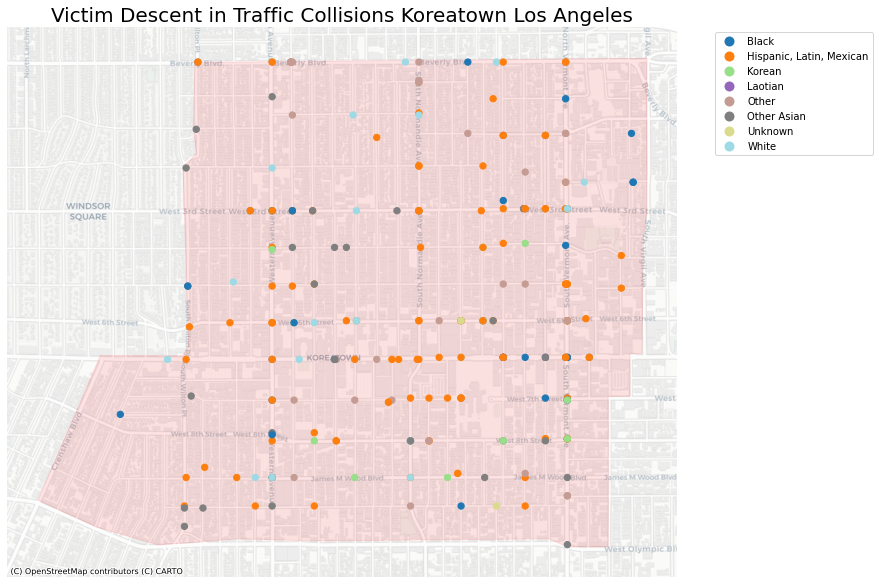

In [62]:
map_collisions_by_neighborhood(place='Koreatown')

In [63]:
collisions_in_neighborhood.tail()

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID Area_Name  \
14803       14803    2020-11-28           2030        1   Central   
14826       14826    2020-11-29           1155        1   Central   
14831       14831    2020-11-29           1100        1   Central   
14832       14832    2020-11-29           1300        1   Central   
14840       14840    2020-11-30            750       13    Newton   

                                 MO_Codes  Victim_Age Victim_Sex  \
14803       0605 3101 3401 3701 3030 3004        25.0       Male   
14826  0605 3101 3401 3701 3030 3004 3036        55.0       Male   
14831  3004 3028 3030 3035 3037 3104 4024        52.0       Male   
14832       0605 3101 3401 3701 3030 3004        31.0     Female   
14840       0605 3101 3401 3701 3030 3004        32.0       Male   

                 Victim_Descent                          Address  \
14803                     Other                              3RD   
14826  Hispanic, Latin, Mexican  6TH                          ST   
14831                     Other                   S  LOS ANGELES   
14832  Hispanic, Latin, Mexican  3RD                          ST   
14840  Hispanic, Latin, Mexican                       WASHINGTON   

                             Cross_Street              Location  Latitude  \
14803                             ALAMEDA  (34.0455, -118.2381)   34.0455   
14826     SAN PEDRO                    ST  (34.0423, -118.2453)   34.0423   
14831  E  7TH                          ST  (34.0439, -118.2497)   34.0439   
14832     LOS ANGELES                  ST  (34.0471, -118.2474)   34.0471   
14840                                15TH  (34.0188, -118.2288)   34.0188   

       Longitude                           geometry  Month  index_right  \
14803  -118.2381  POINT (-13162205.084 4034913.202)     11           28   
14826  -118.2453  POINT (-13163006.585 4034483.298)     11           28   
14831  -118.2497  POINT (-13163496.390 4034698.248)     11           28   
14832  -118.2474  POINT (-13163240.356 4035128.160)     11           28   
14840  -118.2288  POINT (-13161169.813 4031326.686)     11           28   

           name  traffic_collision_count  avg_collisions_per_day  
14803  Downtown                      849                3.303502  
14826  Downtown                      849                3.303502  
14831  Downtown                      849                3.303502  
14832  Downtown                      849                3.303502  
14840  Downtown                      849                3.303502

In [64]:
collisions_in_neighborhood = gpd.GeoDataFrame(collisions_in_neighborhood, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(collisions_in_neighborhood.Longitude, collisions_in_neighborhood.Latitude))

### Interactive Functions

In [65]:
collisions_in_neighborhood = collisions_in_neighborhood.to_crs('EPSG:3857')

collisions_in_neighborhood['x'] = collisions_in_neighborhood.geometry.x
collisions_in_neighborhood['y'] = collisions_in_neighborhood.geometry.y

In [66]:
#make the function interactive 

@interact 

def map_collisions_by_neighborhood(place=neighborhoods.name.unique().tolist()):
    
    # subset the neighborhoods geodataframe for a single neighborhood
    neighborhood = neighborhoods[neighborhoods.name==place]
    
    # use bound box coordinates to set the x and y limits
    minx, miny, maxx, maxy = neighborhood.geometry.total_bounds
    
    # spatial join to get collision information in neighborhood
    collisions_in_neighborhood = gpd.sjoin(df_map,neighborhood,how='inner')
    
    # define the base layer to be the neighborhood polygon
    base = neighborhood.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.1)
    # add the collision data, making sure to add the neighborhood polygon
    ax = collisions_in_neighborhood.plot(ax=base, 
                                         column='Victim_Descent', 
                                         markersize=40, 
                                         legend=True,
                                         cmap='tab20',
                                         legend_kwds={
                                             'loc': 'upper right',
                                             'bbox_to_anchor':(1.3,1)
                                         }                  # this puts the legend to the side
                                        )
    
    # set the map extent to the extent of the neighborhood bounds
    ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
    ax.set_ylim(miny - 200, maxy + 200)
    
    # turn off the axis
    ax.axis('off')
    
    # add a title
    ax.set_title('Victim Descent in Traffic Collisions '+neighborhood.name.values[0]+' Los Angeles',fontsize=20)
    
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax

interactive(children=(Dropdown(description='place', options=('Adams-Normandie', 'Alhambra', 'Arleta', 'Arlingt…

## Point Pattern continued: Heatmaps and Ellipses

In [105]:
#Get a list of the value counts for Victim Descent 

df_map.Victim_Descent.value_counts()

Hispanic, Latin, Mexican           6898
Black                              2859
White                              2404
Other                              1406
Unknown                             590
Other Asian                         432
Korean                               62
Filipino                             26
Chinese                              13
Asian Indian                          8
Vietnamese                            7
American Indian, Alaskan Native       5
Hawaiian                              3
Pacific Islander                      3
Japanese                              2
Guamanian                             2
Laotian                               1
Name: Victim_Descent, dtype: int64

In [106]:
top_25_races = df_map.Victim_Descent.value_counts().head(25).index.tolist()
top_25_races

['Hispanic, Latin, Mexican',
 'Black',
 'White',
 'Other',
 'Unknown',
 'Other Asian',
 'Korean',
 'Filipino',
 'Chinese',
 'Asian Indian',
 'Vietnamese',
 'American Indian, Alaskan Native',
 'Hawaiian',
 'Pacific Islander',
 'Japanese',
 'Guamanian',
 'Laotian']

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID   Area_Name  \
0            0    2020-03-19           2250        2     Rampart   
4            4    2020-03-19           1845       13      Newton   
5            5    2020-03-19           2030       13      Newton   
10          10    2020-03-19           1840        4  Hollenbeck   
12          12    2020-03-19           1315        4  Hollenbeck   

                                   MO_Codes  Victim_Age Victim_Sex  \
0   3101 3401 3701 0605 3029 3036 3004 3026        26.0       Male   
4   3101 3401 3701 3004 3029 3026 3104 0605        33.0     Female   
5   3101 3401 3701 3008 3026 3029 3036 0605        36.0       Male   
10       3101 3401 3701 3004 3026 3036 0605        36.0       Male   
12            3101 3401 3701 0605 3004 3025        31.0       Male   

              Victim_Descent                                  Address  \
0   Hispanic, Latin, Mexican          WILLOW BROOK                 AV   
4   Hispanic, Latin, Mexican  5600 S  CENTRAL                      AV   
5   Hispanic, Latin, Mexican          SAN PEDRO                    ST   
10  Hispanic, Latin, Mexican                               HUNTINGTON   
12  Hispanic, Latin, Mexican          MISSION                      RD   

                       Cross_Street              Location  Latitude  \
0   VERMONT                      AV  (34.0895, -118.2917)   34.0895   
4                               NaN  (33.9917, -118.2564)   33.9917   
5   29TH                         ST  (34.0191, -118.2629)   34.0191   
10                           KENDAL  (34.0949, -118.1645)   34.0949   
12  LINCOLN PARK                 AV  (34.0678, -118.2024)   34.0678   

    Longitude                           geometry  Month  
0   -118.2917  POINT (-13168171.809 4040826.030)      3  
4   -118.2564  POINT (-13164242.231 4027687.593)      3  
5   -118.2629  POINT (-13164965.808 4031366.978)      3  
10  -118.1645  POINT (-13154011.970 4041551.907)      3  
12  -118.2024  POINT (-13158230.979 4037909.547)      3

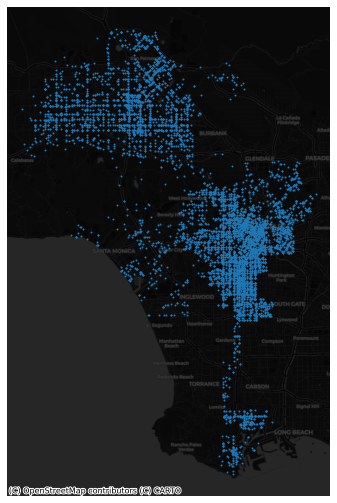

In [107]:
# table
display(df_map[df_map.Victim_Descent == 'Hispanic, Latin, Mexican'].head()) 

# map
ax = df_map[df_map.Victim_Descent == 'Hispanic, Latin, Mexican'].plot(figsize=(9,9), markersize=1)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [108]:
# create a function
def collision_by_race(race='Hispanic, Latin, Mexican'):
    # table
    display(df_map[df_map.Victim_Descent == race].head()) 

    # map
    ax = df_map[df_map.Victim_Descent == race].plot(figsize=(9,9), markersize=1)

    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID  Area_Name  \
1            1    2020-03-19           1405       21    Topanga   
6            6    2020-03-19            320       13     Newton   
20          20    2020-03-19           1330       13     Newton   
42          42    2020-03-19           1345        9   Van Nuys   
44          44    2020-03-19           1525       18  Southeast   

                              MO_Codes  Victim_Age Victim_Sex Victim_Descent  \
1   3003 3037 3029 3034 3026 3101 4026        25.0     Female          Black   
6        3101 3401 3701 3004 3024 0605        22.0       Male          Black   
20       3101 3401 3701 3004 3030 0605        40.0     Female          Black   
42            3004 3037 3026 3101 4026        26.0     Female          Black   
44       4025 3036 3004 3028 3030 3101        41.0     Female          Black   

                            Address                     Cross_Street  \
1                           VENTURA                       QUAKERTOWN   
6   GAGE                         AV                         BROADWAY   
20  SLAUSON                      AV  MAIN                         ST   
42  SEPULVEDA                    BL  MORRISON                     ST   
44  VERMONT                      AV  108TH                        ST   

                Location  Latitude  Longitude  \
1   (34.1714, -118.5698)   34.1714  -118.5698   
6   (33.9824, -118.2783)   33.9824  -118.2783   
20  (33.9892, -118.2739)   33.9892  -118.2739   
42  (34.1603, -118.4662)   34.1603  -118.4662   
44  (33.9382, -118.2916)   33.9382  -118.2916   

                             geometry  Month  
1   POINT (-13199129.759 4051840.144)      3  
6   POINT (-13166680.128 4026439.021)      3  
20  POINT (-13166190.322 4027351.942)      3  
42  POINT (-13187597.060 4050346.763)      3  
44  POINT (-13168160.677 4020506.812)      3

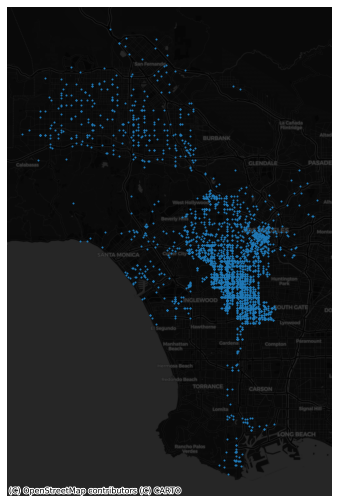

In [109]:
# call the function 
collision_by_race(race='Black')

In [110]:
#Make it interactive

@interact

def collision_by_race(race=top_25_races):
    # table
    display(df_map[df_map.Victim_Descent == race].head()) 

    # map
    ax = df_map[df_map.Victim_Descent == race].plot(figsize=(9,9), markersize=1)

    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='race', options=('Hispanic, Latin, Mexican', 'Black', 'White', 'Oth…

In [111]:
#Include area: 
    
@interact

def collision_by_race(race=top_25_races,
                      area=df_map.Area_Name.unique().tolist()):
    # table
    display(df_map[(df_map.Victim_Descent == race)&(df_map.Area_Name==area)].head()) 

    # map
    ax = df_map[(df_map.Victim_Descent == race)&(df_map.Area_Name==area)].plot(figsize=(9,9), markersize=1)

    # axis
    ax.axis('off')

    # basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='race', options=('Hispanic, Latin, Mexican', 'Black', 'White', 'Oth…

In [112]:
df_map = df_map.to_crs('EPSG:3857')

df_map['x'] = df_map.geometry.x
df_map['y'] = df_map.geometry.y

In [113]:
df_map.head(1)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID Area_Name  \
0           0    2020-03-19           2250        2   Rampart   

                                  MO_Codes  Victim_Age Victim_Sex  \
0  3101 3401 3701 0605 3029 3036 3004 3026        26.0       Male   

             Victim_Descent                          Address  \
0  Hispanic, Latin, Mexican  WILLOW BROOK                 AV   

                      Cross_Street              Location  Latitude  Longitude  \
0  VERMONT                      AV  (34.0895, -118.2917)   34.0895  -118.2917   

                            geometry  Month             x             y  
0  POINT (-13168171.809 4040826.030)      3 -1.316817e+07  4.040826e+06

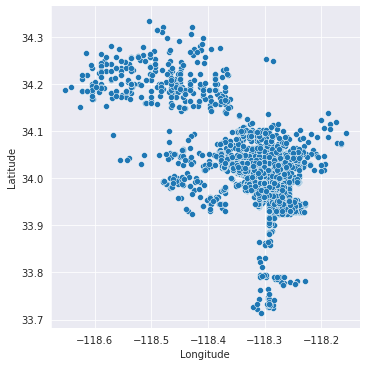

In [114]:
#Seaborn plot simple 

sns.set_style('darkgrid')

data_black = df_map[df_map.Victim_Descent.isin(['Black'])]
sns.relplot(data = data_black,
              x='Longitude', 
              y='Latitude')

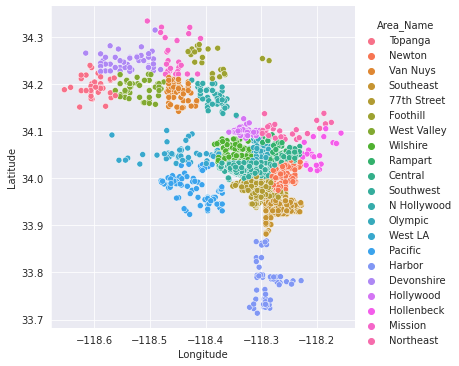

In [115]:
#Seaborn Plot by area

sns.relplot(data = data_black,
              x='Longitude', 
              y='Latitude',
              hue='Area_Name')

In [116]:
#Interactive seaborn plot 

@interact

def collision_areas(area = df_map.Area_Name.unique().tolist()):
    sns.relplot(data = df_map[df_map['Area_Name'] == area],
            x='Longitude', 
            y='Latitude',
            hue='Victim_Descent',
            style='Victim_Descent')

interactive(children=(Dropdown(description='area', options=('Rampart', 'Topanga', 'Central', 'N Hollywood', 'N…

In [117]:
#Interactive Victim Descent by area  

@interact

def collision_areas(area = df_map.Area_Name.unique().tolist()):
    sns.jointplot(data = df_map[df_map['Area_Name'] == area],
                  x='x', 
                  y='y',
                  hue='Victim_Descent',
                  s=10)

interactive(children=(Dropdown(description='area', options=('Rampart', 'Topanga', 'Central', 'N Hollywood', 'N…

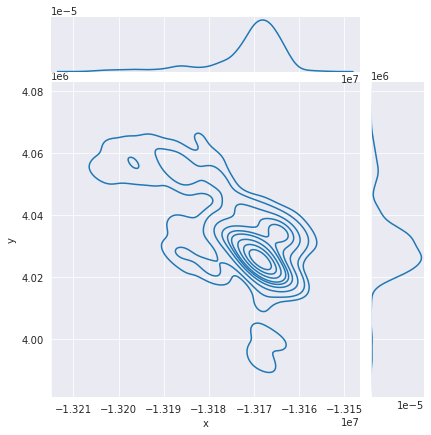

In [118]:
#KDE Plot

sns.jointplot(data = data_black,
              x='x', 
              y='y', 
              kind='kde')

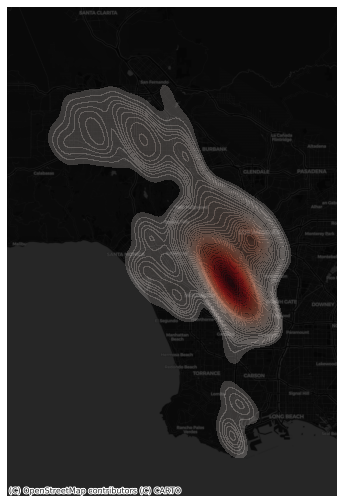

In [119]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# kdeplot
sns.kdeplot(x = data_black.x, 
            y = data_black.y,
            n_levels=50, 
            shade=True,
            thresh=0.05,
            alpha=0.2, 
            cmap='Reds')

# axes
ax.axis('off')

# basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

In [121]:
#get the mean and median

mean_center = centrography.mean_center(df_map[['x','y']])
med_center = centrography.euclidean_median(df_map[['x','y']])

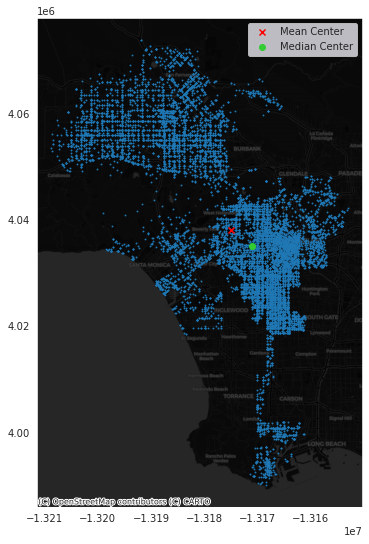

In [122]:
#Plot the mean and median 

# set the style 
sns.set_style('dark')

#figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(df_map['x'], df_map['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

# Display
plt.show()

In [124]:
major, minor, rotation = centrography.ellipse(df_map[['x','y']])

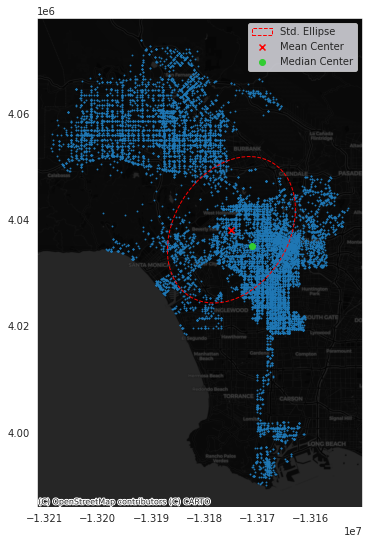

In [125]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(df_map['x'], df_map['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

# Display
plt.show()

In [126]:
#get an interactive map for each neighborhood

@interact
def collision_ellipse(area=df_map.Area_Name.unique().tolist(),
                  race=df_map.Victim_Descent.unique().tolist()):
    
    # filter the data by race
    df_filtered = df_map[(df_map.Victim_Descent == race)&(df_map.Area_Name== area)]

    # mean center and median
    mean_center = centrography.mean_center(df_filtered[['x','y']])
    med_center = centrography.euclidean_median(df_filtered[['x','y']])

    # standard ellipse
    major, minor, rotation = centrography.ellipse(df_filtered[['x','y']])

    # Set up figure and axis
    f, ax = plt.subplots(1, figsize=(9, 9))

    # plot arrest points
    ax.scatter(df_filtered['x'], df_filtered['y'], s=0.75)

    # add the mean and median center points
    ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
    ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

    # heatmap
    sns.kdeplot(x = df_filtered.geometry.x, 
                y = df_filtered.geometry.y,
                n_levels=20, 
                shade=False,
                thresh=0.1,
                alpha=0.3, 
                cmap='Reds', 
                ax=ax)

    # Construct the standard ellipse using matplotlib
    ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                      width=major*2, # centrography.ellipse db_filtered
                      height=minor*2, 
                      angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                      facecolor='none', 
                      edgecolor='red', linestyle='--',
                      label='Std. Ellipse')

    ax.add_patch(ellipse)

    ax.legend()

    ax.axis('Off')

    ax.set_title(str(len(df_filtered)) + ' incidents of collisions with reported victim descent "' + race + '"')

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)
    # Display
    plt.show()

interactive(children=(Dropdown(description='area', options=('Rampart', 'Topanga', 'Central', 'N Hollywood', 'N…

# Analysis of MO Codes 

In [95]:
import numpy as np

In [67]:
#going back to the original dataframe for this analysis 

df.head(1)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID Area_Name  \
0           0    2020-03-19           2250        2   Rampart   

                                  MO_Codes  Victim_Age Victim_Sex  \
0  3101 3401 3701 0605 3029 3036 3004 3026        26.0       Male   

             Victim_Descent                          Address  \
0  Hispanic, Latin, Mexican  WILLOW BROOK                 AV   

                      Cross_Street              Location  Latitude  Longitude  \
0  VERMONT                      AV  (34.0895, -118.2917)   34.0895  -118.2917   

                      geometry  Month  
0  POINT (-118.29170 34.08950)      3

In [68]:
#inserting commas between each MO code listed 

df.MO_Codes = [x.replace(" ", ", ") for x in df.MO_Codes]

In [69]:
df.MO_Codes

0        3101, 3401, 3701, 0605, 3029, 3036, 3004, 3026
1              3003, 3037, 3029, 3034, 3026, 3101, 4026
2                          3101, 3401, 3701, 0605, 3004
3                          3004, 3026, 3101, 4026, 3037
4        3101, 3401, 3701, 3004, 3029, 3026, 3104, 0605
                              ...                      
14870          0605, 3101, 3401, 3701, 3030, 3004, 3036
14871                      4025, 3037, 3004, 3026, 3101
14872                3004, 3028, 3030, 3037, 3101, 4026
14873                3101, 3401, 3701, 3004, 3104, 0605
14874                4025, 3037, 3004, 3026, 3029, 3101
Name: MO_Codes, Length: 14875, dtype: object

In [70]:
#adding quotations around individual codes 

df['MO_w_quotes'] = df['MO_Codes'].apply(lambda x: "'" + str(x) + "'")

In [71]:
df.MO_w_quotes = [x.replace(",", "',") for x in df.MO_w_quotes]

In [72]:
df.MO_w_quotes = [x.replace(" ", " '") for x in df.MO_w_quotes]

In [73]:
#looks good so far! 
df.MO_w_quotes

0        '3101', '3401', '3701', '0605', '3029', '3036'...
1        '3003', '3037', '3029', '3034', '3026', '3101'...
2                   '3101', '3401', '3701', '0605', '3004'
3                   '3004', '3026', '3101', '4026', '3037'
4        '3101', '3401', '3701', '3004', '3029', '3026'...
                               ...                        
14870    '0605', '3101', '3401', '3701', '3030', '3004'...
14871               '4025', '3037', '3004', '3026', '3101'
14872       '3004', '3028', '3030', '3037', '3101', '4026'
14873       '3101', '3401', '3701', '3004', '3104', '0605'
14874       '4025', '3037', '3004', '3026', '3029', '3101'
Name: MO_w_quotes, Length: 14875, dtype: object

In [74]:
#try to get value counts per MO code

df["MO_w_quotes"].value_counts()

'3004', '3037', '3030', '3028', '3101', '4026'                            333
'3004', '3036', '3026', '3101', '4026'                                    291
'3004', '3028', '3030', '3035', '3037', '3101', '3401', '3701', '4027'    262
'3004', '3037', '3026', '3101', '4026'                                    251
'4025', '3037', '3004', '3028', '3030', '3101'                            231
                                                                         ... 
'0605', '3004', '3026', '3029', '3101'                                      1
'4025', '3036', '0101', '3004', '3028', '3034', '3101'                      1
'3037', '3004', '3024', '3101', '0605'                                      1
'4025', '3036', '3008', '3024'                                              1
'1218', '3003', '3025', '3037', '3101', '4026'                              1
Name: MO_w_quotes, Length: 4793, dtype: int64

In [75]:
#looks like they are still reading as one - will try this method provided by Yoh (THANK YOU) to convert string to list

for i, l in enumerate(df["MO_w_quotes"]):
    print("list",i,"is",type(l))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>
list 11 is <class 'str'>
list 12 is <class 'str'>
list 13 is <class 'str'>
list 14 is <class 'str'>
list 15 is <class 'str'>
list 16 is <class 'str'>
list 17 is <class 'str'>
list 18 is <class 'str'>
list 19 is <class 'str'>
list 20 is <class 'str'>
list 21 is <class 'str'>
list 22 is <class 'str'>
list 23 is <class 'str'>
list 24 is <class 'str'>
list 25 is <class 'str'>
list 26 is <class 'str'>
list 27 is <class 'str'>
list 28 is <class 'str'>
list 29 is <class 'str'>
list 30 is <class 'str'>
list 31 is <class 'str'>
list 32 is <class 'str'>
list 33 is <class 'str'>
list 34 is <class 'str'>
list 35 is <class 'str'>
list 36 is <class 'str'>
list 37 is <class 'str'>
list 38 is <class 'str'>
list 39 is <class 'str'>
list 40 is

In [76]:
df["MO_w_quotes"] = df["MO_w_quotes"].apply(eval)

In [77]:
for i, l in enumerate(df["MO_w_quotes"]):
    print("list",i,"is",type(l))

list 0 is <class 'tuple'>
list 1 is <class 'tuple'>
list 2 is <class 'tuple'>
list 3 is <class 'tuple'>
list 4 is <class 'tuple'>
list 5 is <class 'tuple'>
list 6 is <class 'tuple'>
list 7 is <class 'tuple'>
list 8 is <class 'tuple'>
list 9 is <class 'tuple'>
list 10 is <class 'tuple'>
list 11 is <class 'tuple'>
list 12 is <class 'tuple'>
list 13 is <class 'tuple'>
list 14 is <class 'tuple'>
list 15 is <class 'tuple'>
list 16 is <class 'tuple'>
list 17 is <class 'tuple'>
list 18 is <class 'tuple'>
list 19 is <class 'tuple'>
list 20 is <class 'tuple'>
list 21 is <class 'tuple'>
list 22 is <class 'tuple'>
list 23 is <class 'tuple'>
list 24 is <class 'tuple'>
list 25 is <class 'tuple'>
list 26 is <class 'tuple'>
list 27 is <class 'tuple'>
list 28 is <class 'tuple'>
list 29 is <class 'tuple'>
list 30 is <class 'tuple'>
list 31 is <class 'tuple'>
list 32 is <class 'tuple'>
list 33 is <class 'tuple'>
list 34 is <class 'tuple'>
list 35 is <class 'tuple'>
list 36 is <class 'tuple'>
list 37 is 

In [78]:
#still not sure what a tuple is but will continue with the code to see if it works 

df["MO_w_quotes"].dtype

dtype('O')

In [79]:
df.head(1)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID Area_Name  \
0           0    2020-03-19           2250        2   Rampart   

                                         MO_Codes  Victim_Age Victim_Sex  \
0  3101, 3401, 3701, 0605, 3029, 3036, 3004, 3026        26.0       Male   

             Victim_Descent                          Address  \
0  Hispanic, Latin, Mexican  WILLOW BROOK                 AV   

                      Cross_Street              Location  Latitude  Longitude  \
0  VERMONT                      AV  (34.0895, -118.2917)   34.0895  -118.2917   

                      geometry  Month  \
0  POINT (-118.29170 34.08950)      3   

                                        MO_w_quotes  
0  (3101, 3401, 3701, 0605, 3029, 3036, 3004, 3026)

In [80]:
#create lists fot the MO Codes
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [81]:
unique_items = to_1D(df["MO_w_quotes"]).value_counts()

In [82]:
unique_items

3101    14013
3004    12509
3037     6776
3026     6436
3036     6177
        ...  
1000        1
1310        1
2020        1
1407        1
3603        1
Length: 106, dtype: int64

In [83]:
#try this new function for getting trues in columns if the MO code is present

def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [84]:
mo_bool = boolean_df(df["MO_w_quotes"], unique_items.keys())

In [85]:
#try it out 

mo_bool

3101   3004   3037   3026   3036   3701   3401   3030   3028   0605  \
0      True   True  False   True   True   True   True  False  False   True   
1      True  False   True   True  False  False  False  False  False  False   
2      True   True  False  False  False   True   True  False  False   True   
3      True   True   True   True  False  False  False  False  False  False   
4      True   True  False   True  False   True   True  False  False   True   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
14870  True   True  False  False   True   True   True   True  False   True   
14871  True   True   True   True  False  False  False  False  False  False   
14872  True   True   True  False  False  False  False   True   True  False   
14873  True   True  False  False  False   True   True  False  False   True   
14874  True   True   True   True  False  False  False  False  False  False   

       ...   0906   3015   2029   3010   3063   1000   1310   2020   1407  \
0      ...  False  False  False  False  False  False  False  False  False   
1      ...  False  False  False  False  False  False  False  False  False   
2      ...  False  False  False  False  False  False  False  False  False   
3      ...  False  False  False  False  False  False  False  False  False   
4      ...  False  False  False  False  False  False  False  False  False   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
14870  ...  False  False  False  False  False  False  False  False  False   
14871  ...  False  False  False  False  False  False  False  False  False   
14872  ...  False  False  False  False  False  False  False  False  False   
14873  ...  False  False  False  False  False  False  False  False  False   
14874  ...  False  False  False  False  False  False  False  False  False   

        3603  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
14870  False  
14871  False  
14872  False  
14873  False  
14874  False  

[14875 rows x 106 columns]

In [86]:
#IT WORKED! weeks of attempts all in one function. Will see if there are correlation patterns between the MO codes

mo_corr = mo_bool.corr()

In [87]:
mo_corr

3101      3004      3037      3026      3036      3701      3401  \
3101  1.000000  0.085000 -0.081077  0.040631  0.092230  0.032899  0.032866   
3004  0.085000  1.000000  0.012506  0.030744  0.026373 -0.090847 -0.090531   
3037 -0.081077  0.012506  1.000000 -0.055524 -0.769993 -0.308884 -0.308768   
3026  0.040631  0.030744 -0.055524  1.000000  0.105294 -0.056700 -0.056581   
3036  0.092230  0.026373 -0.769993  0.105294  1.000000  0.028135  0.028253   
...        ...       ...       ...       ...       ...       ...       ...   
1000 -0.033060  0.003564 -0.007500 -0.007161 -0.006910 -0.006353 -0.006352   
1310 -0.033060  0.003564 -0.007500 -0.007161 -0.006910 -0.006353 -0.006352   
2020  0.002034  0.003564  0.008964 -0.007161 -0.006910 -0.006353 -0.006352   
1407  0.002034  0.003564 -0.007500 -0.007161 -0.006910  0.010583  0.010584   
3603  0.002034 -0.018863  0.008964 -0.007161 -0.006910 -0.006353 -0.006352   

          3030      3028      0605  ...      0906      3015      2029  \
3101 -0.028297 -0.049034  0.072506  ... -0.033060 -0.033060  0.002034   
3004  0.246450  0.234408 -0.058654  ...  0.003564  0.003564 -0.018863   
3037  0.123746  0.300948 -0.420595  ... -0.007500 -0.007500 -0.007500   
3026 -0.528004 -0.532972 -0.022421  ... -0.007161 -0.007161  0.009389   
3036 -0.167509 -0.170228  0.048453  ... -0.006910  0.009730  0.009730   
...        ...       ...       ...  ...       ...       ...       ...   
1000 -0.005274 -0.005021 -0.004902  ...  1.000000 -0.000067 -0.000067   
1310  0.012748 -0.005021 -0.004902  ... -0.000067 -0.000067 -0.000067   
2020 -0.005274  0.013389 -0.004902  ... -0.000067 -0.000067 -0.000067   
1407 -0.005274 -0.005021  0.013714  ... -0.000067 -0.000067 -0.000067   
3603 -0.005274 -0.005021 -0.004902  ... -0.000067 -0.000067 -0.000067   

          3010      3063      1000      1310      2020      1407      3603  
3101 -0.033060  0.002034 -0.033060 -0.033060  0.002034  0.002034  0.002034  
3004  0.003564 -0.018863  0.003564  0.003564  0.003564  0.003564 -0.018863  
3037 -0.007500  0.008964 -0.007500 -0.007500  0.008964 -0.007500  0.008964  
3026  0.009389 -0.007161 -0.007161 -0.007161 -0.007161 -0.007161 -0.007161  
3036  0.009730 -0.006910 -0.006910 -0.006910 -0.006910 -0.006910 -0.006910  
...        ...       ...       ...       ...       ...       ...       ...  
1000 -0.000067 -0.000067  1.000000 -0.000067 -0.000067 -0.000067 -0.000067  
1310 -0.000067 -0.000067 -0.000067  1.000000 -0.000067 -0.000067 -0.000067  
2020 -0.000067 -0.000067 -0.000067 -0.000067  1.000000 -0.000067 -0.000067  
1407 -0.000067 -0.000067 -0.000067 -0.000067 -0.000067  1.000000 -0.000067  
3603 -0.000067 -0.000067 -0.000067 -0.000067 -0.000067 -0.000067  1.000000  

[106 rows x 106 columns]

In [88]:
#checking the correlation of one code (Vehicle vs Ped)
mo_corr["3003"].sort_values(ascending = False)

3003    1.000000
3024    0.222091
1218    0.213721
3027    0.171142
3025    0.162229
          ...   
3008   -0.083526
3101   -0.115701
3028   -0.184926
3030   -0.199953
3004   -0.756304
Name: 3003, Length: 106, dtype: float64

In [93]:
#so it appears that Vehicle vs Ped (3003) is correlated highest with Severe Injury (3024)
#create a table 
pd.DataFrame(mo_corr["3003"].sort_values(ascending = False))

3003
3003  1.000000
3024  0.222091
1218  0.213721
3027  0.171142
3025  0.162229
...        ...
3008 -0.083526
3101 -0.115701
3028 -0.184926
3030 -0.199953
3004 -0.756304

[106 rows x 1 columns]

In [90]:
#trying with Veh vs Bike (3008) 
mo_corr["3008"].sort_values(ascending = False)

3008    1.000000
3025    0.170234
3401    0.074212
3701    0.074174
3024    0.057887
          ...   
3034   -0.050801
3003   -0.083526
3028   -0.127227
3030   -0.128109
3004   -0.579142
Name: 3008, Length: 106, dtype: float64

In [91]:
#Veh vs Bike is correlated highest with Visible Injury (3025)
#Trying with Bike vs Vehicle (3016- different than 3008)
mo_corr["3016"].sort_values(ascending = False)

3016    1.000000
0605    0.013007
3030    0.011676
4025    0.009513
3401    0.008555
          ...   
3029   -0.006361
4026   -0.007024
3026   -0.012403
3037   -0.012991
3004   -0.019725
Name: 3016, Length: 106, dtype: float64

In [92]:
#get a table for the frequency in each row
mo_int = mo_bool.astype(int)
mo_int.head(10)

3101  3004  3037  3026  3036  3701  3401  3030  3028  0605  ...  0906  \
0     1     1     0     1     1     1     1     0     0     1  ...     0   
1     1     0     1     1     0     0     0     0     0     0  ...     0   
2     1     1     0     0     0     1     1     0     0     1  ...     0   
3     1     1     1     1     0     0     0     0     0     0  ...     0   
4     1     1     0     1     0     1     1     0     0     1  ...     0   
5     1     0     0     1     1     1     1     0     0     1  ...     0   
6     1     1     0     0     0     1     1     0     0     1  ...     0   
7     1     1     0     0     0     1     1     1     0     1  ...     0   
8     1     0     0     1     0     1     1     0     0     1  ...     0   
9     1     1     0     0     0     1     1     0     0     1  ...     0   

   3015  2029  3010  3063  1000  1310  2020  1407  3603  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0     0  
5     0     0     0     0     0     0     0     0     0  
6     0     0     0     0     0     0     0     0     0  
7     0     0     0     0     0     0     0     0     0  
8     0     0     0     0     0     0     0     0     0  
9     0     0     0     0     0     0     0     0     0  

[10 rows x 106 columns]

In [96]:
#get another frequency table 
mo_freq_mat = np.dot(mo_int.T, mo_int)

In [97]:
mo_freq_mat

array([[14013, 11894,  6243, ...,     1,     1,     1],
       [11894, 12511,  5733, ...,     1,     1,     0],
       [ 6243,  5733,  6776, ...,     1,     0,     1],
       ...,
       [    1,     1,     1, ...,     1,     0,     0],
       [    1,     1,     0, ...,     0,     1,     0],
       [    1,     0,     1, ...,     0,     0,     1]])

In [98]:
mo_freq = pd.DataFrame(mo_freq_mat, columns = unique_items.keys(), index = unique_items.keys())

In [99]:
mo_freq

3101   3004  3037  3026  3036  3701  3401  3030  3028  0605  ...  0906  \
3101  14013  11894  6243  6133  5977  5312  5311  4056  3746  3801  ...     0   
3004  11894  12511  5733  5496  5266  4454  4454  4271  3980  3154  ...     1   
3037   6243   5733  6776  2728     3  1434  1434  2400  2841   412  ...     0   
3026   6133   5496  2728  6436  3055  2212  2212   113     6  1622  ...     0   
3036   5977   5266     3  3055  6177  2417  2417  1249  1129  1783  ...     0   
...     ...    ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1000      0      1     0     0     0     0     0     0     0     0  ...     1   
1310      0      1     0     0     0     0     0     1     0     0  ...     0   
2020      1      1     1     0     0     0     0     0     1     0  ...     0   
1407      1      1     0     0     0     1     1     0     0     1  ...     0   
3603      1      0     1     0     0     0     0     0     0     0  ...     0   

      3015  2029  3010  3063  1000  1310  2020  1407  3603  
3101     0     1     0     1     0     0     1     1     1  
3004     1     0     1     0     1     1     1     1     0  
3037     0     0     0     1     0     0     1     0     1  
3026     0     1     1     0     0     0     0     0     0  
3036     1     1     1     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1000     0     0     0     0     1     0     0     0     0  
1310     0     0     0     0     0     1     0     0     0  
2020     0     0     0     0     0     0     1     0     0  
1407     0     0     0     0     0     0     0     1     0  
3603     0     0     0     0     0     0     0     0     1  

[106 rows x 106 columns]

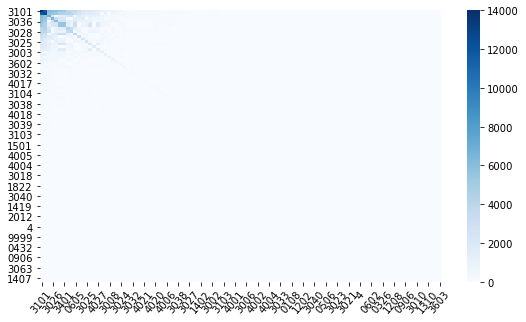

In [100]:
#frequecny visual! 

fig, ax = plt.subplots(figsize = (9,5))
sns.heatmap(mo_freq, cmap = "Blues")
plt.xticks(rotation=50)
plt.savefig("heatmap.png", dpi = 300)